In [1]:
import os

In [2]:
os.chdir(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD')

In [3]:
os.getcwd()

'G:\\Pranit\\STUDY\\ProjectU\\Pan Card\\Collab Code\\ID_CARD'

In [4]:
from PIL import Image

In [20]:
Real_id=Image.open('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\org.jpg')

In [21]:
Check_id=Image.open(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\dub.jpg')

In [22]:
print("Real_id image format : ",Real_id.format) 
print("Check_id image format : ",Check_id.format)

Real_id image format :  JPEG
Check_id image format :  JPEG


In [23]:
print("Real_id image size : ",Real_id.size) 
print("Check_id image size : ",Check_id.size) 

Real_id image size :  (908, 578)
Check_id image size :  (797, 510)


In [24]:
Real_id = Real_id.resize((500, 318))
print(Real_id.size)
Real_id.save(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Original_id1.jpg')#Save image
Check_id = Check_id.resize((500, 318))
print(Check_id.size)
Check_id.save(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Testing_id1.jpg')#Saves image

(500, 318)
(500, 318)


In [25]:
Image.open('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Original_id1.jpg').convert('RGB').save(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Original_id2.jpg')           
Real_id=Image.open('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Original_id2.jpg')

In [26]:
Image.open('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Testing_id1.jpg').convert('RGB').save(r'G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Testing_id2.jpg')           
Check_id=Image.open('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Testing_id2.jpg')

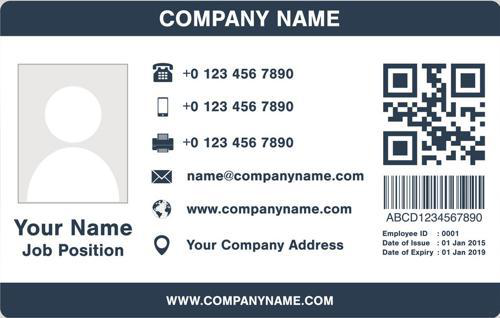

In [27]:
Real_id

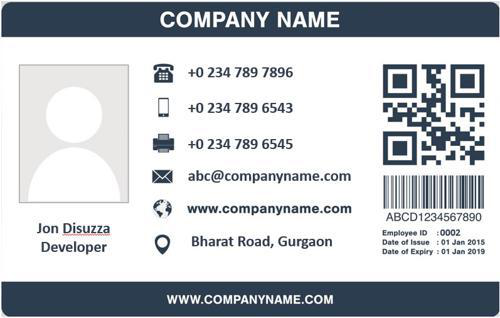

In [28]:
Check_id

In [29]:
import cv2

In [38]:
Real_id = cv2.imread('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Original_id2.jpg')
Check_id = cv2.imread('G:\Pranit\STUDY\ProjectU\Pan Card\Collab Code\ID_CARD\Testing_id2.jpg')

In [39]:
gray_Real_id = cv2.cvtColor(Real_id, cv2.COLOR_BGR2GRAY)
gray_Check_id = cv2.cvtColor(Check_id, cv2.COLOR_BGR2GRAY)

In [40]:
from skimage.metrics import structural_similarity

In [41]:
(score, diff) = structural_similarity(gray_Real_id, gray_Check_id, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.7830680646282754


In [42]:
import imutils

In [43]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [44]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(Real_id, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(Check_id, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


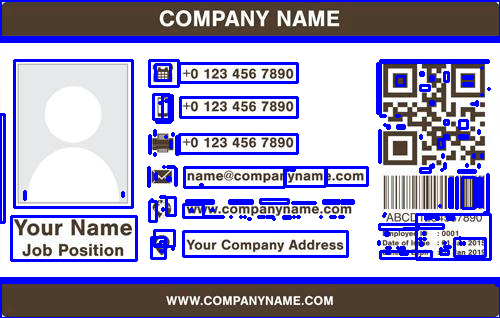

In [45]:
print('Original Format Image')
Image.fromarray(Real_id)

Tampered Image


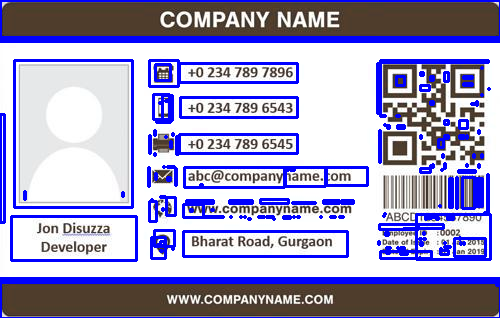

In [46]:
print('Tampered Image')
Image.fromarray(Check_id)

Different Image


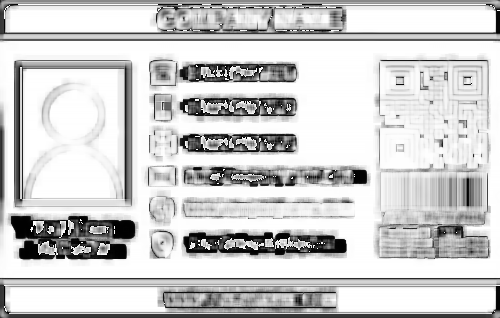

In [47]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


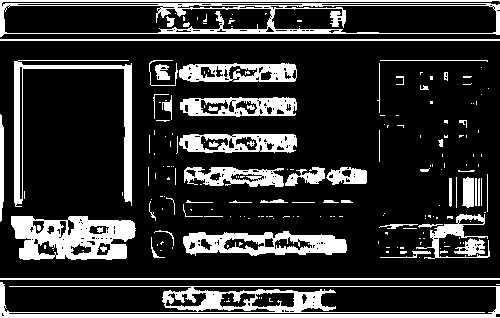

In [48]:
print('Threshold Image')
Image.fromarray(thresh)